In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,intetnet+phone
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,True,0,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,intetnet+phone
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,intetnet+phone
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,intetnet+phone
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,intetnet+phone


In [3]:
df.shape

(7049, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7049 non-null   object 
 1   gender                     7049 non-null   object 
 2   is_senior_citizen          7049 non-null   int64  
 3   partner                    7049 non-null   object 
 4   dependents                 7049 non-null   object 
 5   phone_service              7049 non-null   int64  
 6   internet_service           7049 non-null   int64  
 7   contract_type              7049 non-null   int64  
 8   payment_type               7049 non-null   object 
 9   monthly_charges            7049 non-null   float64
 10  total_charges              7038 non-null   float64
 11  churn                      7049 non-null   object 
 12  tenure                     7049 non-null   float64
 13  is_female                  7049 non-null   bool 

In [17]:
df = df.dropna()
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,intetnet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,intetnet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,intetnet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,intetnet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,intetnet+phone


In [18]:
df.shape

(7038, 26)

In [19]:
df['contract_type'] = df.contract_type.replace([0,1,2], ['Month_to_month', '1year', '2year'])
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,intetnet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,intetnet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,intetnet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,intetnet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,intetnet+phone


In [20]:
df['phone_service'] = df.phone_service.replace([0,1,2], ['No_phone_service', 'one_line', 'two_or_more_lines'])
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,intetnet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,intetnet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,intetnet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,intetnet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,intetnet+phone


In [21]:
df.shape

(7038, 26)

In [22]:
df['internet_service'] = df.internet_service.replace([0,1,2], ['No_internet', 'DSL', 'Fiber_optic'])
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,intetnet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,intetnet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,intetnet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,intetnet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,intetnet+phone


In [23]:
df['partner_dependents'] = df.partner_dependents.replace([0,1,2,3],
                        ['no partners and no dependents','partner only','dependents only',
                        'partner and dependents'])
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,intetnet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,intetnet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,intetnet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,intetnet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,intetnet+phone


In [157]:
df['service_type'] = df.service_type.replace('intertnet+phone', 'internet+phone')
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,internet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,internet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,internet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,internet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,internet+phone


In [158]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female',
       'haas_churned', 'has_phone', 'has_internet', 'has_phone_and_internrt',
       'partner_dependents', 'caculated_monthly_charges', 'validate',
       'phone_service_type', 'internet_service_type', 'contract_type.1',
       'rounded_tenure', 'service_type'],
      dtype='object')

### 1. By service type

In [159]:
pd.crosstab(df.service_type, df.churn, margins=True)

churn,No,Yes,All
service_type,,,
internet only,510,171,681
internet+phone,3248,1586,4834
phone only,1410,113,1523
All,5168,1870,7038


In [160]:
ctab_service_type = pd.crosstab(df.service_type, df.churn, normalize = 'index')
ctab_service_type
# Yes, internet+phone has higher churn, 33%. Need to try to make more people use both phone and internet.

churn,No,Yes
service_type,,
internet only,0.748899,0.251101
internet+phone,0.671907,0.328093
phone only,0.925804,0.074196


Text(0, 0.5, 'Service type')

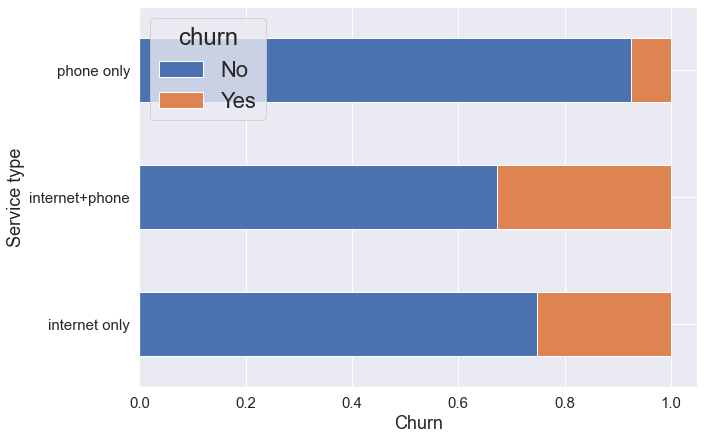

In [161]:
ctab_service_type.plot.barh(stacked = True, figsize = (10, 7), fontsize = 15)
plt.xlabel('Churn',fontsize = 18)
plt.ylabel('Service type', fontsize = 18)

### 2. By contract type

In [27]:
pd.crosstab(df.contract_type, df.churn, margins=True)

churn,No,Yes,All
contract_type,,,
1year,1309,166,1475
2year,1639,48,1687
Month_to_month,2220,1656,3876
All,5168,1870,7038


In [28]:
ctab_contract_type = pd.crosstab(df.contract_type, df.churn, normalize = 'index')
ctab_contract_type

churn,No,Yes
contract_type,,
1year,0.887458,0.112542
2year,0.971547,0.028453
Month_to_month,0.572755,0.427245


Text(0, 0.5, 'Contract type')

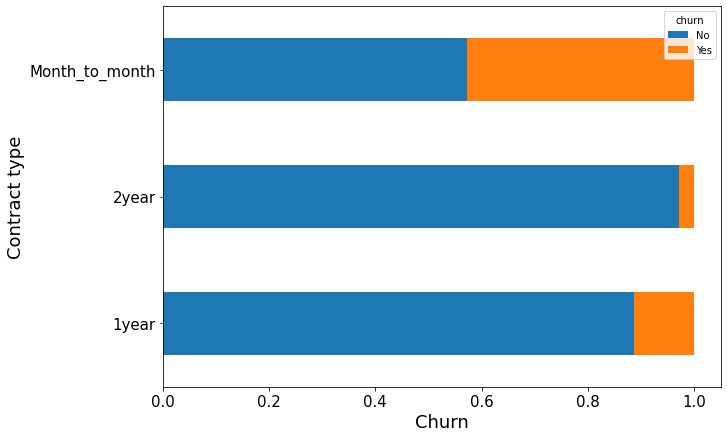

In [81]:
ctab_contract_type.plot.barh(stacked = True, figsize = (10, 7), fontsize = 15)
plt.xlabel('Churn', fontsize = 18)
plt.ylabel('Contract type', fontsize = 18)
# Yes. Month-to-month contract type have more customer churn

### 3. By payment_type 

In [32]:
pd.crosstab(df.payment_type, df.churn, margins=True)

churn,No,Yes,All
payment_type,,,
Bank transfer (automatic),1287,259,1546
Credit card (automatic),1291,232,1523
Electronic check,1294,1071,2365
Mailed check,1296,308,1604
All,5168,1870,7038


In [30]:
ctab_payment_type = pd.crosstab(df.payment_type, df.churn, normalize = 'index')
ctab_payment_type

churn,No,Yes
payment_type,,
Bank transfer (automatic),0.832471,0.167529
Credit card (automatic),0.847669,0.152331
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


Text(0, 0.5, 'Payment type')

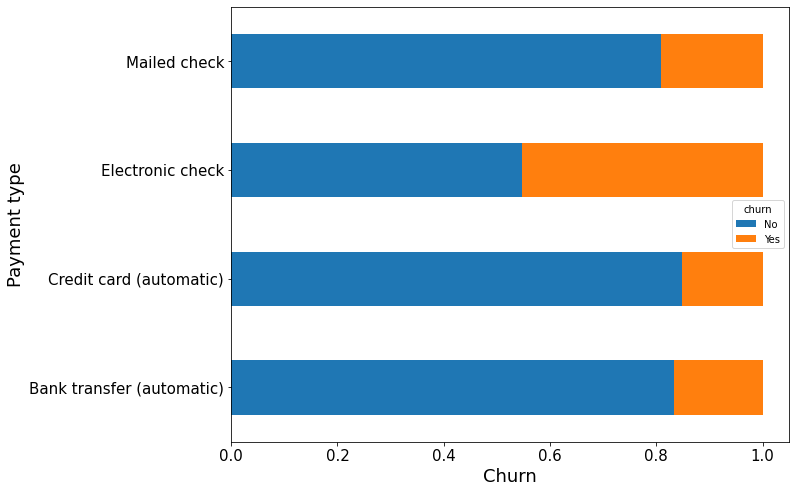

In [82]:
ctab_payment_type.plot.barh(stacked = True, figsize = (10, 8), fontsize = 15)
plt.xlabel('Churn', fontsize = 18)
plt.ylabel('Payment type', fontsize = 18)
# Yes. It's very obvious that electric check has more churn

### 4. By monthly charges

In [162]:
df.groupby('churn').monthly_charges.mean()

churn
No     61.297359
Yes    74.417834
Name: monthly_charges, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

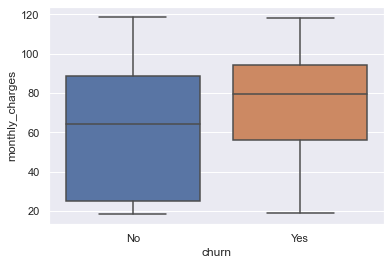

In [172]:
sns.boxplot(data = df, y = 'monthly_charges', x = 'churn')

In [164]:
df.groupby('service_type').monthly_charges.mean()
# higher monthly charge means customers are using both internet and phone. 

service_type
internet only     41.975624
internet+phone    81.767698
phone only        21.073966
Name: monthly_charges, dtype: float64

### 5. By tunure

In [57]:
df.groupby('churn').tenure.mean()

churn
No     37.666447
Yes    17.960909
Name: tenure, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='tenure'>

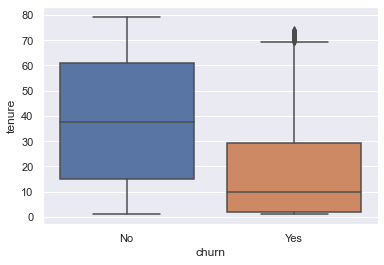

In [173]:
sns.boxplot(data = df, y = 'tenure', x = 'churn')
# ??? lower tenure has more churn

### 6. Gender

In [71]:
pd.crosstab(df.gender, df.churn, normalize = 'index')
# No. results are very close.

churn,No,Yes
gender,,
Female,0.730350,0.269650
Male,0.738176,0.261824


### 7. By is senior

In [33]:
pd.crosstab(df.is_senior_citizen, df.churn, margins=True)
# No. Senior is a very small portion of total.

churn,No,Yes,All
is_senior_citizen,,,
0,4502,1394,5896
1,666,476,1142
All,5168,1870,7038


### 8. By partner and dependents

In [37]:
pd.crosstab(df.partner_dependents, df.churn, margins=True)
# customer with no partners and no dependents has higher churn. So customers group need to be focues on.

churn,No,Yes,All
partner_dependents,,,
dependents only,282,77,359
no partners and no dependents,2158,1123,3281
partner and dependents,1495,250,1745
partner only,1233,420,1653
All,5168,1870,7038


In [41]:
df.groupby('partner_dependents').monthly_charges.mean()

partner_dependents
dependents only                  52.570891
no partners and no dependents    62.970512
partner and dependents           61.047966
partner only                     74.977737
Name: monthly_charges, dtype: float64

In [125]:
pd.crosstab(df.partner_dependents, df.churn, normalize = 'index')

churn,No,Yes
partner_dependents,,
dependents only,0.785515,0.214485
no partners and no dependents,0.657726,0.342274
partner and dependents,0.856734,0.143266
partner only,0.745917,0.254083


Text(0, 0.5, 'Partner and dependent type')

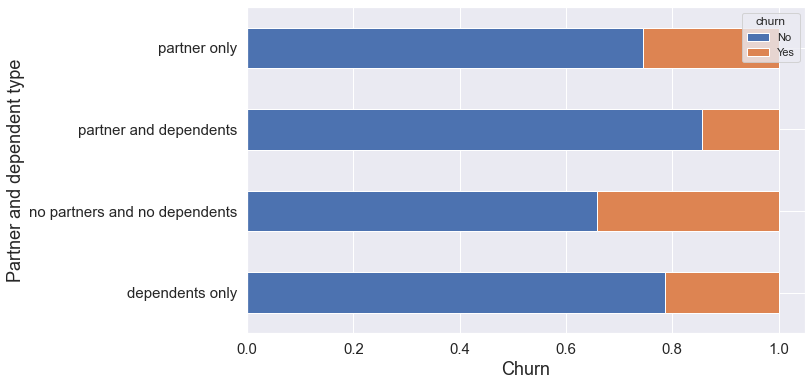

In [176]:
pd.crosstab(df.partner_dependents, df.churn, normalize = 'index').plot.barh(stacked = True, figsize = (10,6), fontsize = 15)
plt.xlabel('Churn',fontsize = 18)
plt.ylabel('Partner and dependent type', fontsize = 18)

### 9. By phone service type

In [59]:
pd.crosstab(df.phone_service, df.churn, margins=True)
# only have one line means no parter and no dependent.

churn,No,Yes,All
phone_service,,,
No_phone_service,510,171,681
one_line,2541,849,3390
two_or_more_lines,2117,850,2967
All,5168,1870,7038


In [8]:
pd.crosstab(df.phone_service, df.churn, normalize = 'index')

churn,No,Yes
phone_service,,
No_phone_service,0.749634,0.250366
one_line,0.749926,0.250074
two_or_more_lines,0.713901,0.286099


### 10. By internet service type

In [60]:
pd.crosstab(df.internet_service, df.churn, margins=True)

churn,No,Yes,All
internet_service,,,
DSL,1957,460,2417
Fiber_optic,1801,1297,3098
No_internet,1410,113,1523
All,5168,1870,7038


In [61]:
pd.crosstab(df.internet_service, df.churn, margins=True, normalize = 'index')
# Fiber has higher churn than DSL.

churn,No,Yes
internet_service,,
DSL,0.809681,0.190319
Fiber_optic,0.581343,0.418657
No_internet,0.925804,0.074196
All,0.734300,0.265700


### Conclusion : Service type, contract type, payment type, internet service type, partner and ddependent type, tenure are the 


### 11. Since internet+phone has the largest group, I want to dig more in this group. Does it show the same results?

In [165]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,internet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,internet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,internet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,internet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,internet+phone


In [179]:
both = df[df['service_type'] == 'internet+phone']
both.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,internet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,internet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,internet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,internet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,internet+phone


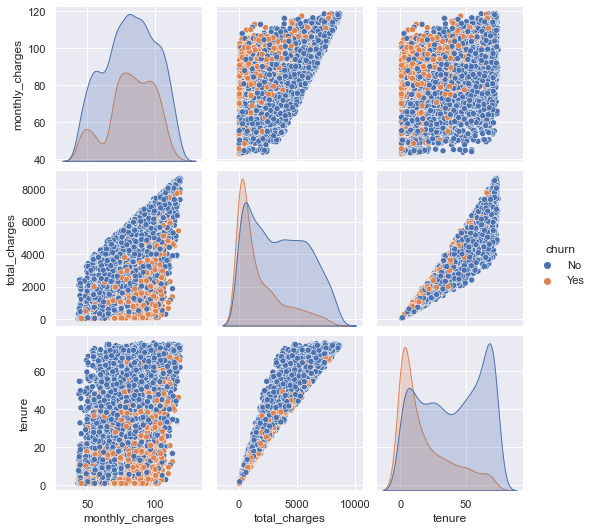

In [180]:
sns.pairplot(both[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

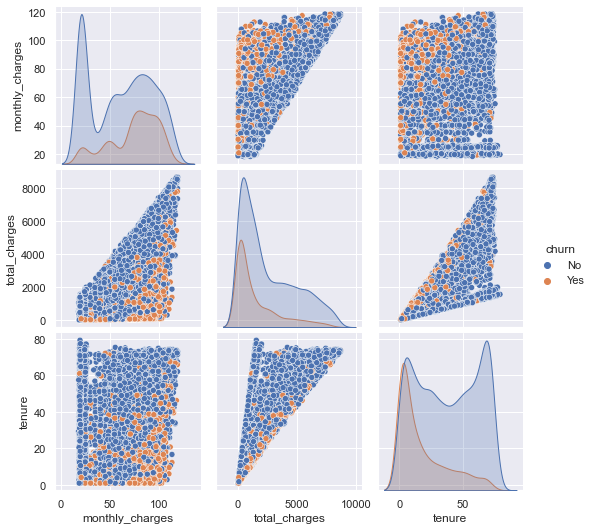

In [181]:
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

In [ ]:
# contract type, payment type, internet service type, partner and ddependent type, tenure

In [182]:
both.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internrt,partner_dependents,caculated_monthly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,...,True,True,partner and dependents,65.6,TRUE,One Line,DSL,1 Year,9.0,internet+phone
1,0003-MKNFE,Male,0,No,No,two_or_more_lines,DSL,Month_to_month,Mailed check,59.9,...,True,True,no partners and no dependents,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,internet+phone
2,0004-TLHLJ,Male,0,No,No,one_line,Fiber_optic,Month_to_month,Electronic check,73.9,...,True,True,no partners and no dependents,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,internet+phone
3,0011-IGKFF,Male,1,Yes,No,one_line,Fiber_optic,Month_to_month,Electronic check,98.0,...,True,True,partner only,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,internet+phone
4,0013-EXCHZ,Female,1,Yes,No,one_line,Fiber_optic,Month_to_month,Mailed check,83.9,...,True,True,partner only,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,internet+phone


In [187]:
# contract type
pd.crosstab(both.contract_type, both.churn, margins = True, normalize = 'index')
# month-month still the highest one

churn,No,Yes
contract_type,,
1year,0.851967,0.148033
2year,0.955207,0.044793
Month_to_month,0.528403,0.471597
All,0.671907,0.328093


In [188]:
# payment type
pd.crosstab(both.payment_type, both.churn, margins = True, normalize = 'index')
# eletric check still the highest one

churn,No,Yes
payment_type,,
Bank transfer (automatic),0.795136,0.204864
Credit card (automatic),0.803468,0.196532
Electronic check,0.524046,0.475954
Mailed check,0.714085,0.285915
All,0.671907,0.328093


In [192]:
# internet service type
pd.crosstab(both.internet_service, both.churn, margins = True,normalize = 'index')
# Fiber still have higher churn

churn,No,Yes
internet_service,,
DSL,0.833525,0.166475
Fiber_optic,0.581343,0.418657
All,0.671907,0.328093


In [196]:
# partner and ddependent type
pd.crosstab(both.partner_dependents, both.churn, margins = True, normalize = 'index')
# single still have higher churn

churn,No,Yes
partner_dependents,,
dependents only,0.683417,0.316583
no partners and no dependents,0.586328,0.413672
partner and dependents,0.800189,0.199811
partner only,0.715944,0.284056
All,0.671907,0.328093


In [197]:
# tenure
both.groupby('churn').tenure.mean()
# lower tenure has higher churn

churn
No     39.968658
Yes    18.904351
Name: tenure, dtype: float64